# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3



Chosen class grouping: two-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes exists. Continuing with execution


In [3]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2 exists. Continuing with execution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,active_hand,h_mean_x,h_mean_y,...,cp0z,cp11x,cp11y,cp11z,cp12x,cp12y,cp12z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,0.360239,0.416955,...,-0.181956,-2.098741,0.873798,0.027716,-2.306700,1.885125,-0.694826,-2.896234,1.150676,-0.222430
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,0.561710,0.987890,...,-0.181956,-3.480238,0.964271,0.265744,-2.306700,1.885125,-0.694826,-2.414786,1.221503,-0.128008
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,0.358858,0.415220,...,-0.333521,-2.066678,1.008282,-0.080830,-2.165842,2.062525,-0.801491,-2.825404,1.313214,-0.356977
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,0.561693,0.987804,...,-0.333521,-3.455541,1.185928,0.076849,-2.165842,2.062525,-0.801491,-2.343657,1.351576,-0.232162
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,2,1,0.357507,0.414159,...,-0.233376,-2.168897,0.905824,0.014499,-2.366600,1.999840,-0.726445,-2.981283,1.221755,-0.257633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,9,0,0.427331,0.818829,...,-0.084159,-2.557804,1.086794,0.216372,-1.526016,1.644848,-0.550490,-1.936456,1.060899,-0.106899
5002,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,10,1,0.631197,0.275317,...,-0.062124,-1.350568,0.798976,0.045304,-1.538694,1.641183,-0.535136,-1.488300,1.035166,0.027075
5003,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,10,0,0.426652,0.818555,...,-0.062124,-2.565837,1.078161,0.218660,-1.538694,1.641183,-0.535136,-1.948699,1.025206,-0.083890
5004,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,11,1,0.631751,0.276256,...,0.009736,-1.291110,0.718431,0.083880,-1.526755,1.476018,-0.468762,-1.434433,0.942531,0.069260


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_3189/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_3189/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_318

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.201585,-0.695849,...,-1.190547,0.144624,-1.052542,0.949354,-1.128392,-1.058306,0.853374,0.395291,0.417724,-0.050689
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,1.600955,0.668264,...,-0.627160,-0.597281,1.230006,0.398494,0.555939,1.079430,0.619193,0.260344,0.089914,-0.305942
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.216894,-0.772363,...,-1.993344,0.274069,-1.048720,0.998680,-0.899116,-1.070409,0.920118,0.380465,0.410592,-0.018753
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,1.612733,0.704059,...,-1.248616,-0.610061,1.228591,0.390564,0.514821,1.080583,0.612138,0.265111,0.091679,-0.284382
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.168830,-0.794856,...,-1.400593,0.290432,-1.047773,0.946659,-0.929924,-1.067628,0.838448,0.406830,0.436870,-0.076876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,0,9,-0.200983,1.423259,...,-0.501213,1.264105,0.444921,-2.295753,-0.756838,0.758756,-2.049851,-2.087809,-2.041749,-0.371880
5002,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,1,10,0.743301,-0.664289,...,0.298163,-0.191717,-1.052687,0.951223,0.672443,-1.072301,1.021858,-0.052100,0.398069,0.216546
5003,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,0,10,-0.188922,1.354637,...,-0.363924,1.335148,0.450235,-2.239405,-0.749408,0.781796,-1.955011,-2.148083,-2.065422,-0.503508
5004,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,1,11,0.732512,-0.660089,...,0.549870,-0.187842,-1.052783,0.953039,0.690341,-1.071664,1.031353,-0.043040,0.397170,0.203790


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def visualize(origin_df, data_cols, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    labels_cat = origin_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    data = reducer.fit_transform(origin_df[data_cols])
    sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{sup.DATA_AH_PF}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [12]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/pca/ exists. Continuing with execution


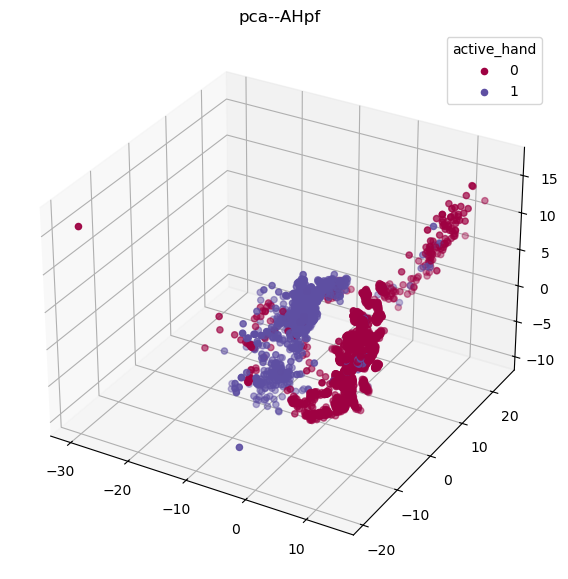

In [13]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

In [14]:
ah_frm_big_PCA = PCA(n_components=40)
ah_frm_big_PCA.fit(PH3_AH_FRM_PCA_df[ah_pf_dataCols])
ah_frm_big_PCA.explained_variance_ratio_

array([3.22689727e-01, 2.45118945e-01, 2.40552997e-01, 8.45312623e-02,
       3.74340517e-02, 1.52396065e-02, 1.36586269e-02, 1.21016530e-02,
       7.93983228e-03, 6.06763024e-03, 3.90928926e-03, 2.69408446e-03,
       2.18323608e-03, 1.82325853e-03, 1.15306212e-03, 8.63527432e-04,
       8.12695936e-04, 2.63888970e-04, 2.32184773e-04, 1.75901861e-04,
       1.25732653e-04, 9.97845712e-05, 7.20158566e-05, 6.96821531e-05,
       3.32917526e-05, 2.97876481e-05, 2.42525381e-05, 2.13577460e-05,
       1.80727636e-05, 8.77199125e-06, 7.67269802e-06, 6.96029089e-06,
       5.25031244e-06, 4.31932269e-06, 4.19070587e-06, 3.82684669e-06,
       3.03466888e-06, 2.78403779e-06, 2.15846899e-06, 1.77359240e-06])

#### Writeout

In [15]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3

## Kernel PCA

In [16]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [17]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.201585,-0.695849,...,-1.190547,0.144624,-1.052542,0.949354,-1.128392,-1.058306,0.853374,0.395291,0.417724,-0.050689
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,1.600955,0.668264,...,-0.627160,-0.597281,1.230006,0.398494,0.555939,1.079430,0.619193,0.260344,0.089914,-0.305942
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.216894,-0.772363,...,-1.993344,0.274069,-1.048720,0.998680,-0.899116,-1.070409,0.920118,0.380465,0.410592,-0.018753
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,1.612733,0.704059,...,-1.248616,-0.610061,1.228591,0.390564,0.514821,1.080583,0.612138,0.265111,0.091679,-0.284382
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.168830,-0.794856,...,-1.400593,0.290432,-1.047773,0.946659,-0.929924,-1.067628,0.838448,0.406830,0.436870,-0.076876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,0,9,-0.200983,1.423259,...,-0.501213,1.264105,0.444921,-2.295753,-0.756838,0.758756,-2.049851,-2.087809,-2.041749,-0.371880
5002,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,1,10,0.743301,-0.664289,...,0.298163,-0.191717,-1.052687,0.951223,0.672443,-1.072301,1.021858,-0.052100,0.398069,0.216546
5003,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,0,10,-0.188922,1.354637,...,-0.363924,1.335148,0.450235,-2.239405,-0.749408,0.781796,-1.955011,-2.148083,-2.065422,-0.503508
5004,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,p11,5,1,b,1,1,11,0.732512,-0.660089,...,0.549870,-0.187842,-1.052783,0.953039,0.690341,-1.071664,1.031353,-0.043040,0.397170,0.203790


In [18]:
nystroem = Nystroem(kernel='rbf', gamma=0.5, n_components=500)  # 500 basis vectors
reducer = make_pipeline(nystroem, PCA(n_components=2))  # Optional PCA
data = reducer.fit_transform(PH3_AH_FRM_KPCA_df[ah_pf_dataCols])

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/kpca/poly exists. Continuing with execution


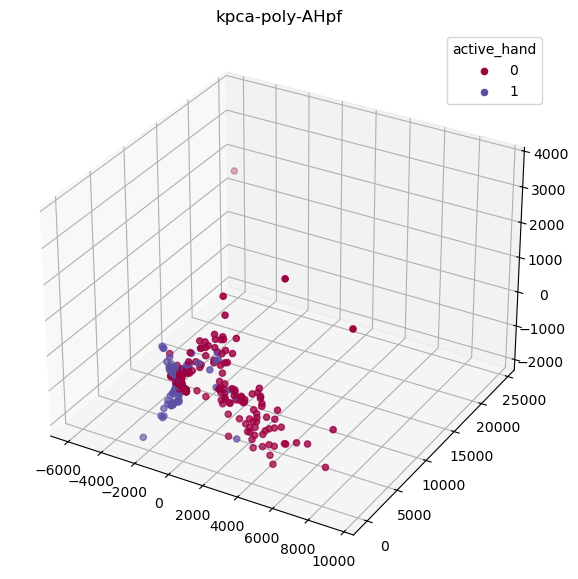

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/kpca/rbf exists. Continuing with execution


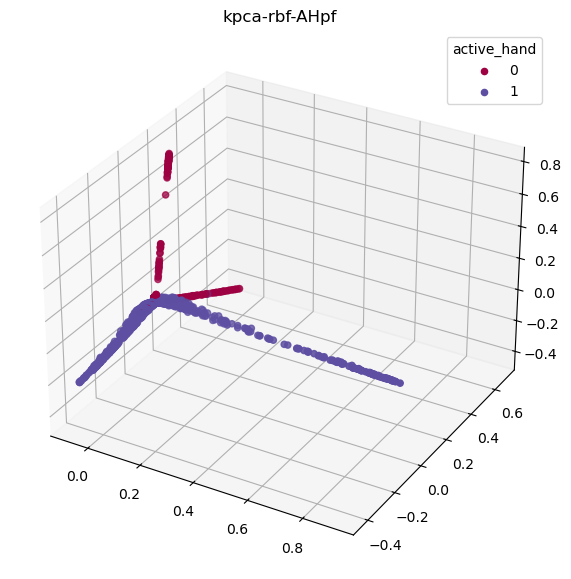

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/kpca/sigmoid exists. Continuing with execution


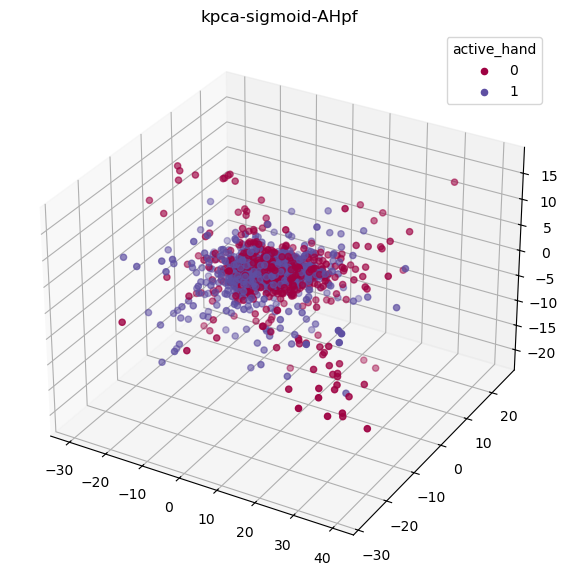

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/kpca/cosine exists. Continuing with execution


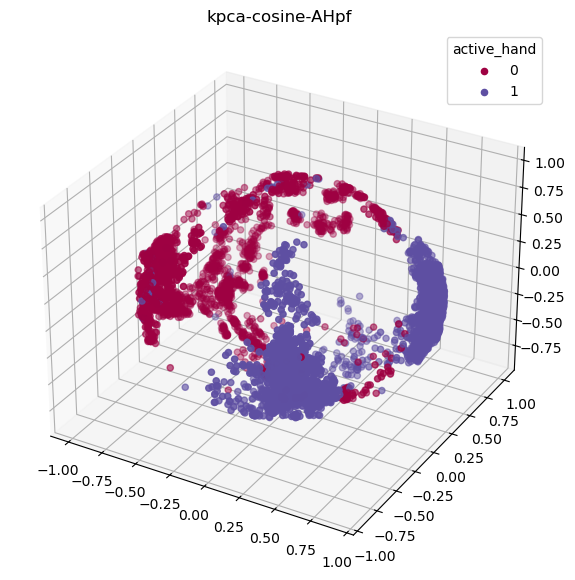

In [19]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [20]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/kpca/poly exists. Continuing with execution
Directo

## UMAP

In [21]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


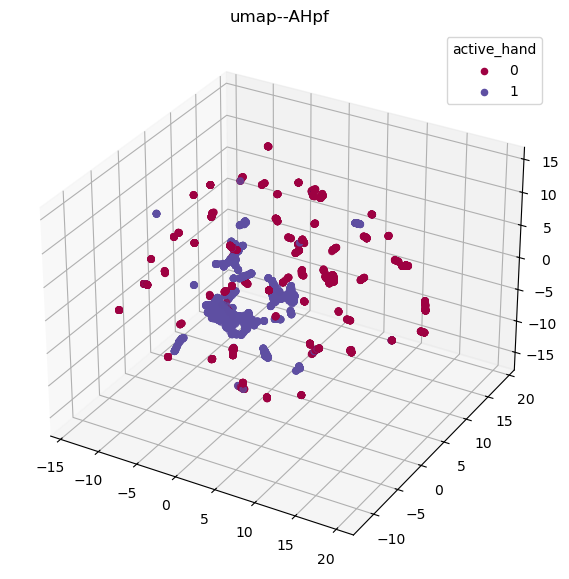

In [22]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [23]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/two-classes/w2/umap/ exists. Continuing with execution
